In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importation du jeu de données

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# I - ANALYSE INITIALE DU PROBLEME

## I - 1 - Compréhension du contexte de fraude

Le jeu de données soumis à notre étude contient les transactions par carte bancaire effectuées en septembre 2013 par des titulaires européens.
Il présente les transactions réalisées sur deux jours et recense 492 fraudes sur 284 807 transactions. L'ensemble de données est fortement déséquilibré : les transactions frauduleuses ne représentent que 0,172 % du total.

Ce jeu de données contient uniquement des variables d'entrée numériques, issues d'une transformation ACP. Pour des raisons de confidentialité, ni les variables d'origine ni les informations complémentaires sur les données ont été fournis. Les variables V1, V2, …, V28 correspondent aux composantes principales obtenues par ACP. Seules les variables « Temps » et « Montant » n'ont pas été transformées par ACP. La variable « Temps » représente le temps écoulé en secondes entre chaque transaction et la première transaction du jeu de données. La variable « Montant » correspond au montant de chaque transaction ; elle peut être utilisée pour un apprentissage sensible aux coûts et dépendant des exemples. 

* Objectif :
    - Identifier les transactions frauduleuses
    - Minimiser les fraudes non détectées

In [10]:
## I - 2 - Identification du type de tâche

In [4]:
df["Class"].unique()

array([0, 1])

In [5]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Comme le target << Class >> contient uniquement deux valeurs : 
- 1 : transaction frauduleuse
- 0 : transaction non frauduleuse

On conclut qu'il s'agit d'un problème de **classification binaire**

In [8]:
# II - EXPLORATION ET DIAGNOSTIC DES DONNEES

## II - 1 - STATISTIQUES DESCRIPTIVES

In [13]:
df.shape

(284807, 31)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Le dataset contient : 
* 284807 lignes (transactions bancaires)
* 31 colonnes de type numérique :
  - Variable cibles : Class
  - Variables explicatives anonymisées : V1 ---> V8
  - Variables explicatives explicites : Time et Amount

In [45]:
# Statisques globales

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


Les valeurs étant différentes entre les variables time, V1 --- V28 et Amount, alors nous allons les normaliser ou standardiser dans le suite.

## II - 2 - ANALYSE EXPLORATOIRE DES DONNEES (EDA)

### II - 2 - a - Gestion des valeurs redondantes

In [7]:
df.duplicated().sum()

np.int64(1081)

In [47]:
df[df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


Nous avons dans notre jeu de données **1081 lignes dupliquées*
Nous allons les supprimer car ils peuvent baisées notre analyse

In [4]:
df = df.drop_duplicates()

In [5]:
df.duplicated().sum()

0

In [30]:
df.shape

(283726, 31)

Nous avons dorénavant **283726 lignes** dans notre jeu de données

In [55]:
# Matrice de corrélation

df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


In [19]:
df.corr()['Class'].sort_values()

V17      -0.313498
V14      -0.293375
V12      -0.250711
V10      -0.206971
V16      -0.187186
V3       -0.182322
V7       -0.172347
V18      -0.105340
V1       -0.094486
V9       -0.094021
V5       -0.087812
V6       -0.043915
Time     -0.012359
V24      -0.007210
V23      -0.006333
V13      -0.003897
V15      -0.003300
V25       0.003202
V26       0.004265
V22       0.004887
Amount    0.005777
V28       0.009682
V20       0.021486
V27       0.021892
V21       0.026357
V8        0.033068
V19       0.033631
V2        0.084624
V4        0.129326
V11       0.149067
Class     1.000000
Name: Class, dtype: float64

### II - 2 - a - Gestion des valeurs abbérantes

In [6]:
normal_df = df[df["Class"] == 0]

In [7]:
Q1 = normal_df["Amount"].quantile(0.25)

# Q1 = 1er quartile de Amount pour la classe 0.

# 25% des transactions normales ont un montant ≤ Q1.

In [8]:
Q3 = normal_df["Amount"].quantile(0.75)


# Q3 = 3e quartile de Amount pour la classe 0.

# 75% des transactions normales ont un montant ≤ Q3.

In [9]:
IQR = Q3 - Q1

On sélectionne les transactions dont Amount est :
- en dessous de la borne basse OU
- au-dessus de la borne haute

Ce sous-ensemble outliers_normal contient donc les transactions non frauduleuses dont le montant est atypique par rapport à la masse des transactions normales.

In [10]:
outliers_normal = normal_df[
    (normal_df["Amount"] < Q1 - 1.5 * IQR) |
    (normal_df["Amount"] > Q3 + 1.5 * IQR)
]

In [10]:
outliers_normal

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
20,16.0,0.694885,-1.361819,1.029221,0.834159,-1.191209,1.309109,-0.878586,0.445290,-0.446196,...,-0.295583,-0.571955,-0.050881,-0.304215,0.072001,-0.422234,0.086553,0.063499,231.71,0
51,36.0,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,...,1.393406,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0
64,42.0,-0.522666,1.009923,0.276470,1.475289,-0.707013,0.355243,1.559849,-0.399579,-0.479813,...,0.172401,1.011543,0.069666,0.157820,-1.109224,-0.302369,0.318170,0.316910,243.66,0
85,55.0,-4.575093,-4.429184,3.402585,0.903915,3.002224,-0.491078,-2.705393,0.666451,1.922216,...,-0.047365,0.853360,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,200.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284735,172727.0,-1.661169,-0.565425,0.294268,-1.549156,-2.301359,2.365956,-0.248881,-0.857361,0.137784,...,1.432397,-0.257828,-0.072471,-1.035804,-0.437889,-0.238543,0.365302,-0.448621,381.05,0
284748,172738.0,1.634178,-0.486939,-1.975967,0.495364,0.263635,-0.713049,0.459925,-0.336879,0.743676,...,-0.113197,-0.493594,0.001993,0.602533,-0.049936,-0.145522,-0.040554,0.024884,220.28,0
284753,172743.0,1.465737,-0.618047,-2.851391,1.425282,0.893893,-0.958325,1.508074,-0.625691,-0.369824,...,0.500426,0.870491,-0.495410,0.676929,0.787688,-0.254918,-0.117200,-0.014737,337.54,0
284757,172745.0,-1.757643,-0.982659,1.091540,-1.409539,-0.662159,0.046930,0.173241,0.364812,1.143381,...,-0.191471,-0.432979,-0.292549,-0.281494,-0.484349,0.366751,-0.102628,-0.458915,200.00,0


In [11]:
outliers_normal["Class"].value_counts()

Class
0    31621
Name: count, dtype: int64

Nous allons émettre une hypothèse :
- “Les transactions normales contiennent-elles des montants extrêmes qui peuvent influencer les modèles ?”

- Evaluons leur impact.

In [12]:
len(outliers_normal), len(normal_df), (len(outliers_normal)/len(normal_df))*100

(31621, 283253, 11.163518126904217)

Les outliers de la classe normale corrspondent à 11% des transactions non frauduleuses.

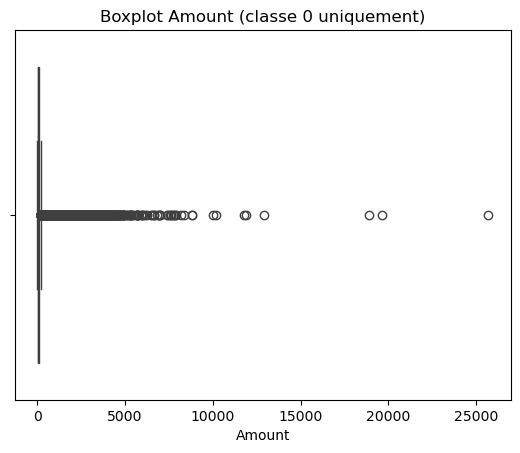

In [59]:
sns.boxplot(x=normal_df["Amount"])
plt.title("Boxplot Amount (classe 0 uniquement)")
plt.show()

Afin d’évaluer la présence de valeurs extrêmes dans la classe majoritaire (transactions non frauduleuses), nous avons appliqué la méthode de Tukey (IQR) sur la variable Amount. Cette approche robuste permet d’identifier les observations dont le montant est atypique par rapport à la distribution centrale. Dans un contexte de détection de fraude, ces valeurs extrêmes ne doivent pas être supprimées automatiquement car elles peuvent correspondre à des transactions légitimes rares ou partager des caractéristiques avec des fraudes. Elles sont donc analysées afin de comprendre leur impact sur les transformations et les méthodes de rééquilibrage.

Question importante :

* Est-ce que les outliers de la classe normale ressemblent aux fraudes ?

      - OUI → dangereux de les supprimer

      - NON → suppression éventuellement des outliers

Commencons par  comparer 3 groupes :
- transactions normales
- outliers de la classe normale
- fraudes

In [13]:
fraude_df = df[df["Class"] == 1]

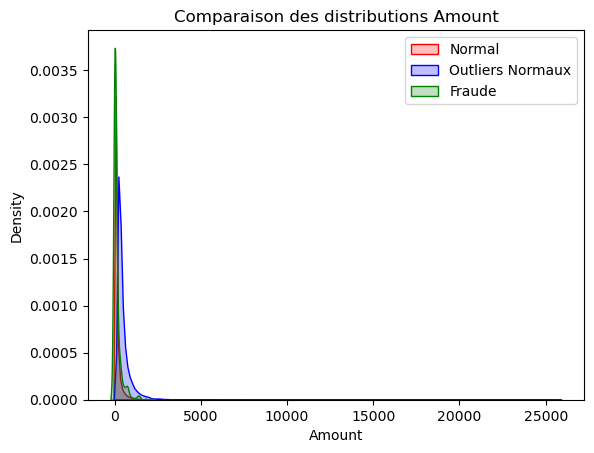

In [14]:
sns.kdeplot(normal_df["Amount"], label="Normal", fill=True, color="red")
sns.kdeplot(outliers_normal["Amount"], label="Outliers Normaux", fill=True, color="blue")
sns.kdeplot(fraude_df["Amount"], label="Fraude", fill=True, color="green")

plt.legend()
plt.title("Comparaison des distributions Amount")
plt.show()

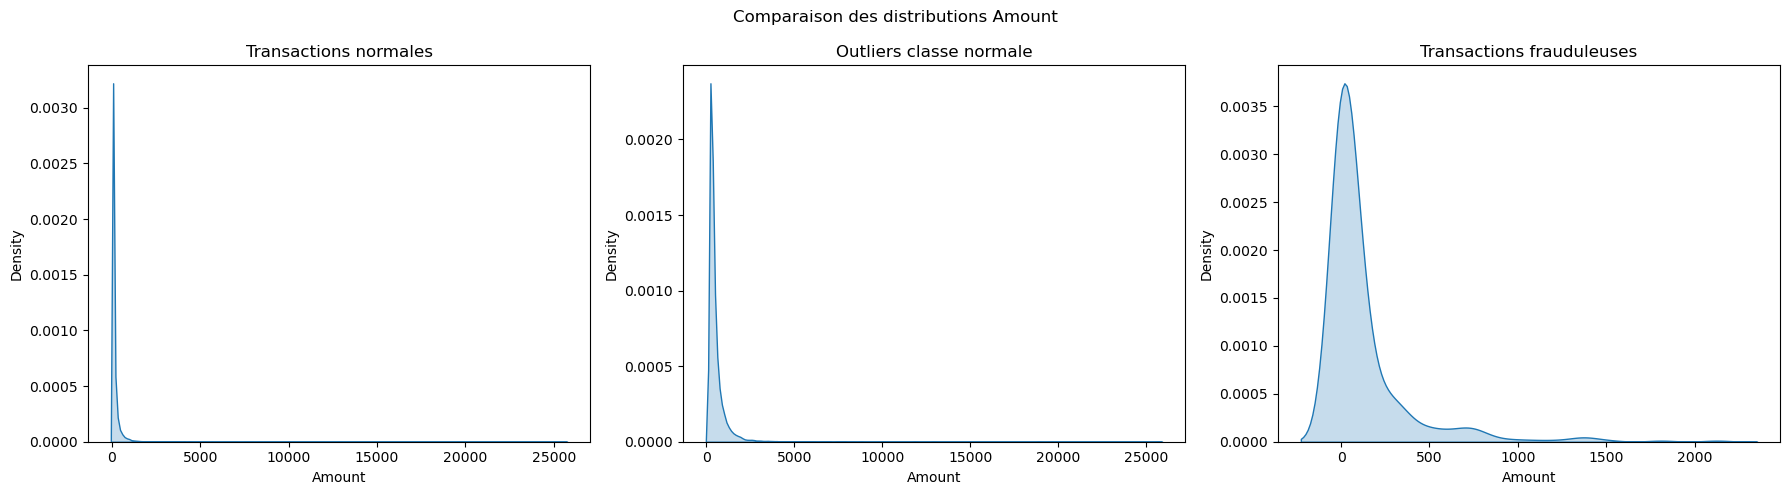

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Graphique 1 — Normal
sns.kdeplot(normal_df["Amount"], fill=True, ax=axes[0])
axes[0].set_title("Transactions normales")

# Graphique 2 — Outliers normaux
sns.kdeplot(outliers_normal["Amount"], fill=True, ax=axes[1])
axes[1].set_title("Outliers classe normale")

# Graphique 3 — Fraudes
sns.kdeplot(fraude_df["Amount"], fill=True, ax=axes[2])
axes[2].set_title("Transactions frauduleuses")

plt.suptitle("Comparaison des distributions Amount")
plt.tight_layout()
plt.show()

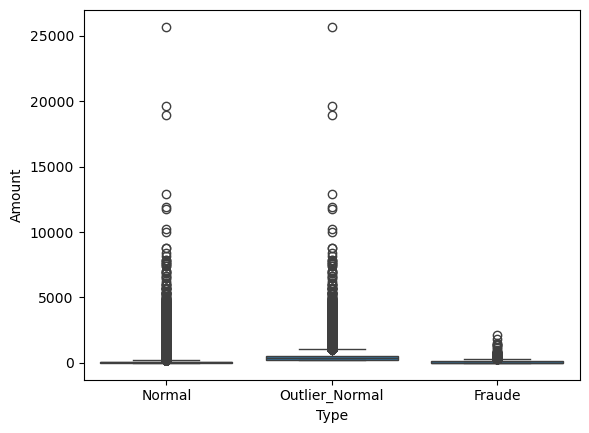

In [18]:
# Comparaison avec boxplot

comparison_df = pd.concat([
    normal_df.assign(Type="Normal"),
    outliers_normal.assign(Type="Outlier_Normal"),
    fraude_df.assign(Type="Fraude")
])

sns.boxplot(x="Type", y="Amount", data=comparison_df)
plt.show()

In [19]:
# Comparaison statistique

comparison_df.groupby("Type")["Amount"].describe()

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Fraude,473.0,123.871860,260.211041,0.00,1.00,9.82,105.89,2125.87
Normal,283253.0,88.413575,250.379023,0.00,5.67,22.00,77.46,25691.16
Outlier_Normal,31621.0,512.621006,587.150931,185.17,240.00,335.00,551.44,25691.16


Conclusion :

L’analyse comparative des transactions normales, des outliers issus de la classe majoritaire et des fraudes montre que certaines transactions normales extrêmes présentent des caractéristiques similaires aux fraudes. Dans un contexte de détection d’anomalies, ces observations peuvent contenir une information pertinente pour l’apprentissage du modèle. Par conséquent, la suppression systématique des outliers n’est pas retenue à ce stade.

### II - 2 - a - Gestion des valeurs manquantes

In [14]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Le jeu de données possède aucune valeur manquante

### II - 3 - ANALYSE DES DISTRIBUTIONS ET ASYMETRIES

In [15]:
numeric_columns = list(df.columns.drop('Class'))

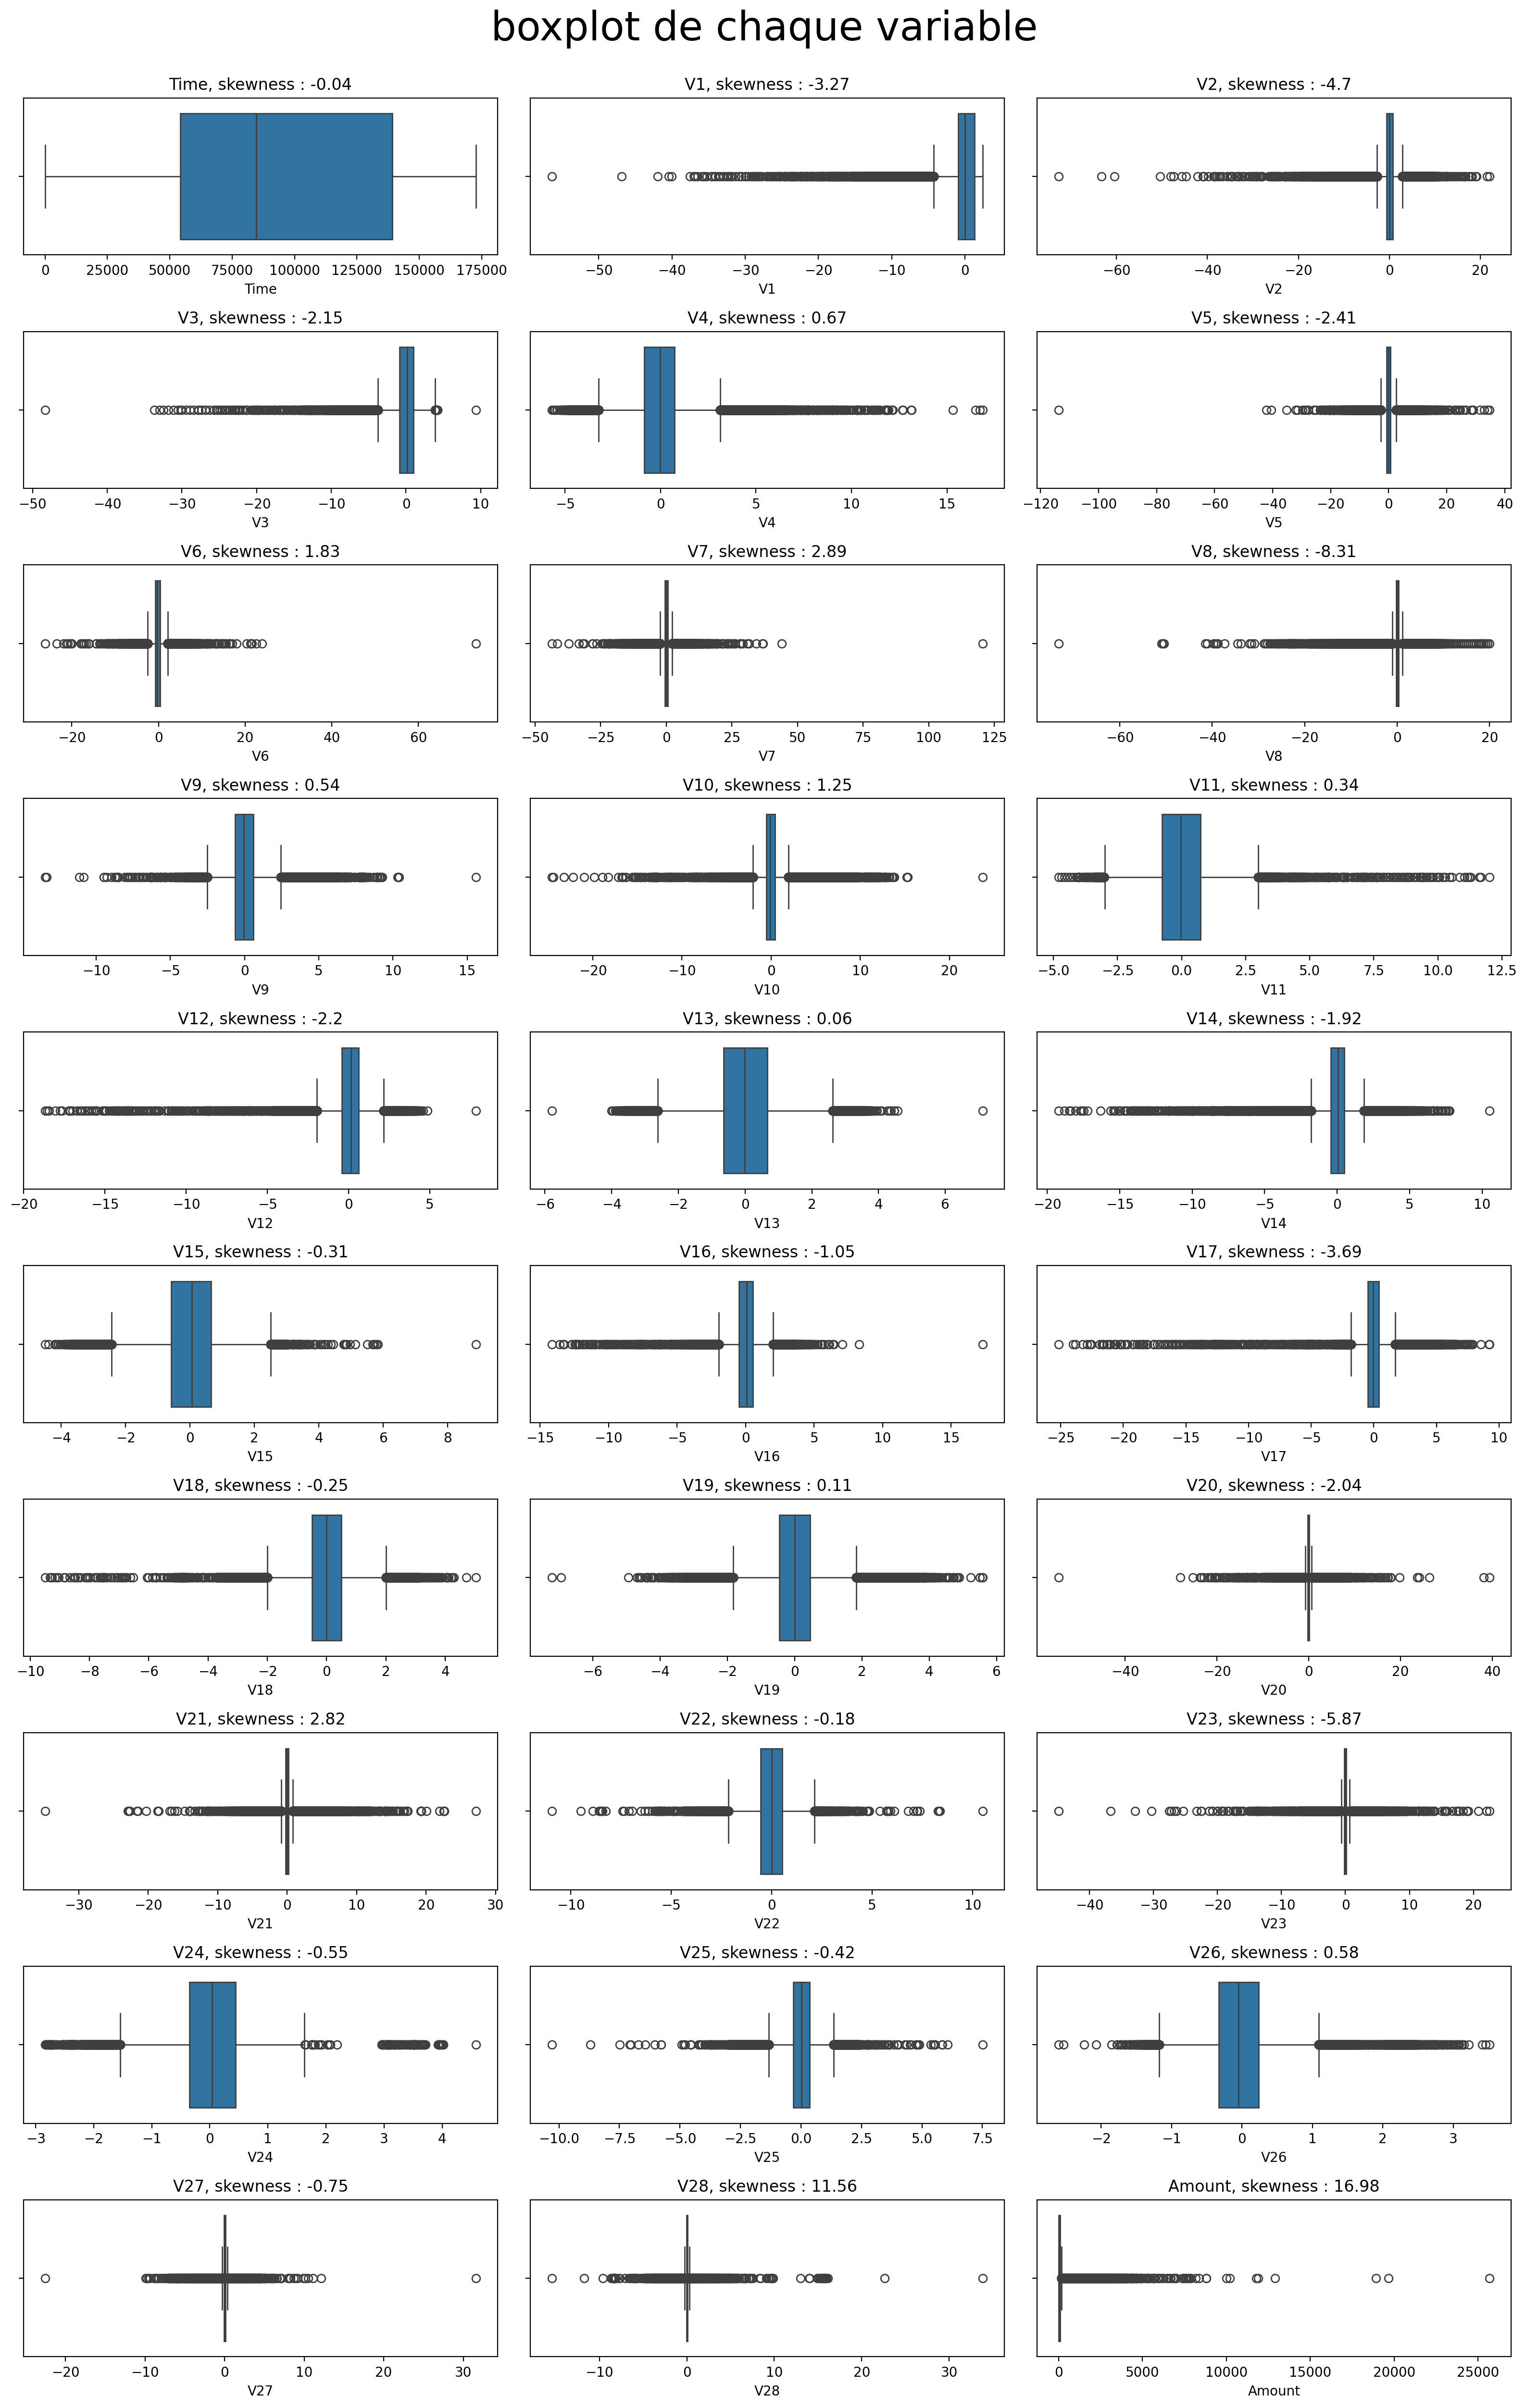

In [22]:
def all_boxplots(dataset, columns_list, rows, cols, suptitle) :
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16, 25), dpi=200)
    fig.suptitle(suptitle, y=1, size=30)
    axs = axs.flatten()

    for i, data in enumerate(columns_list) :
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(f'{data}, skewness : {round(dataset[data].skew(axis=0, skipna=True), 2)}')

all_boxplots(dataset=df, columns_list=numeric_columns, rows=10, cols=3, suptitle='boxplot de chaque variable')
plt.tight_layout()

On constate que les données sont symétriques sauf la variable Amount et nous constatons aussi de nombreuses valeurs abbérantes

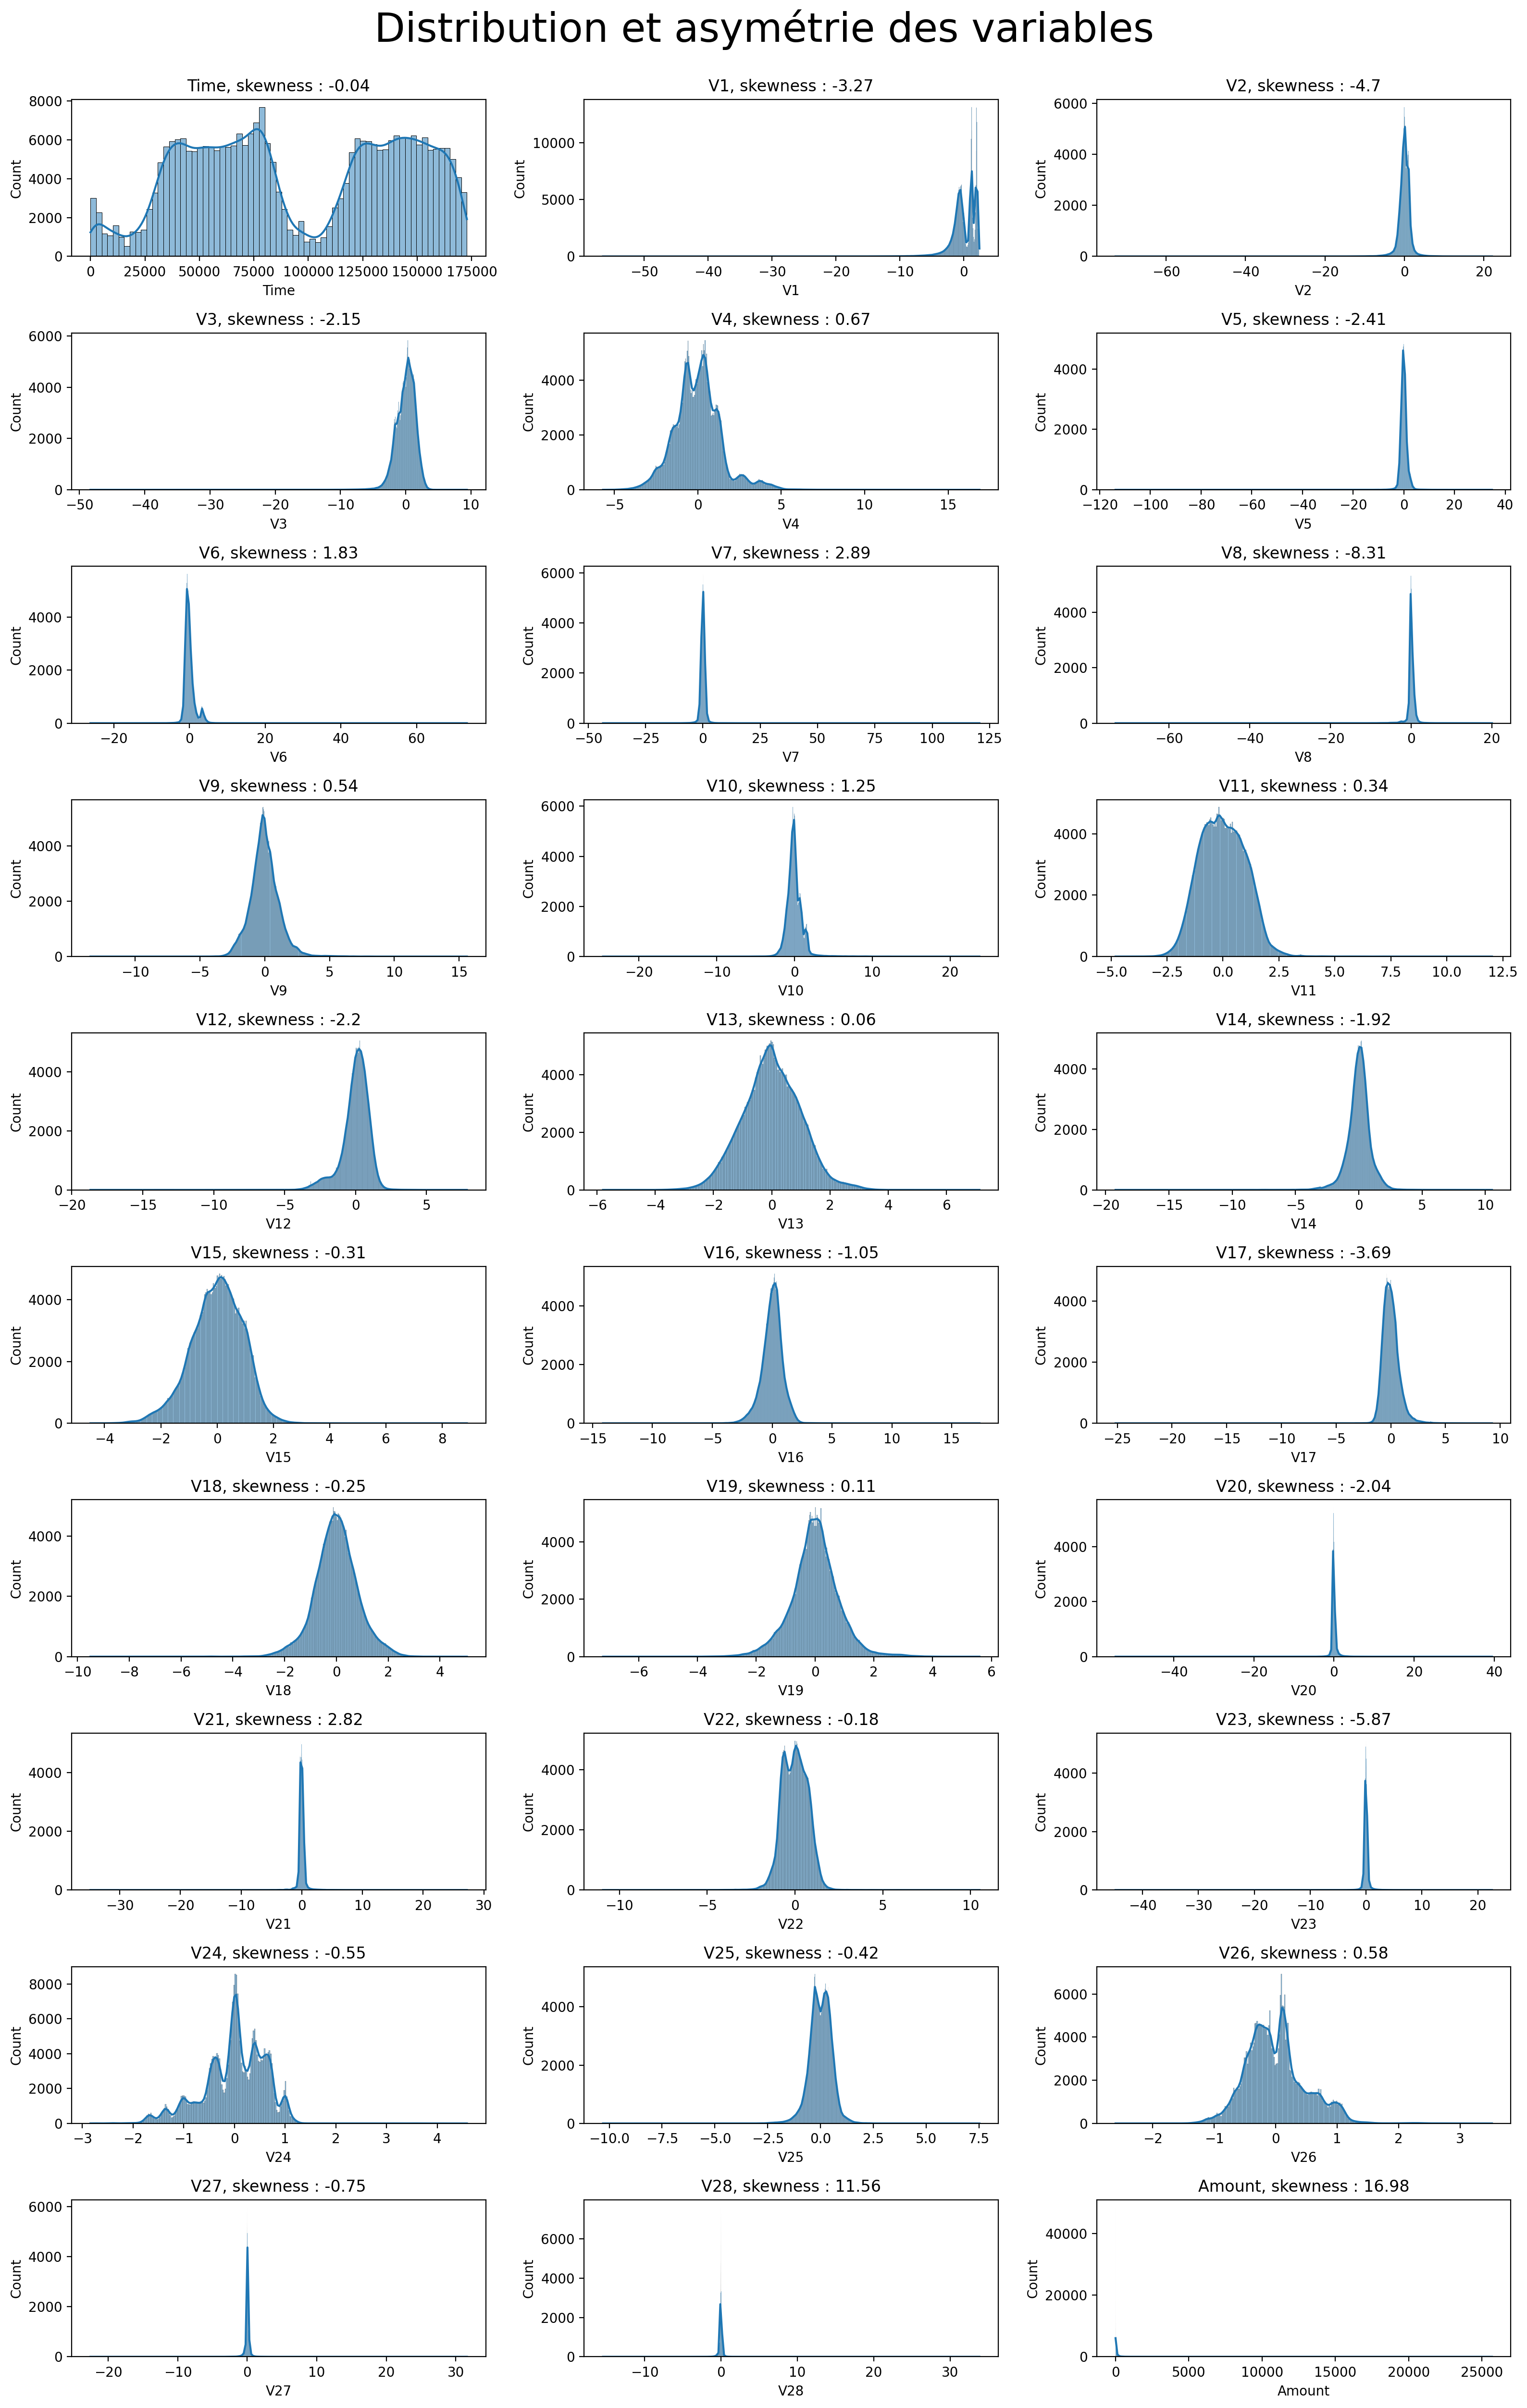

In [24]:
def all_histplots(dataset, columns_list, rows, cols, suptitle):

    fig, axs = plt.subplots(rows, cols, figsize=(16, 25), dpi=200)
    fig.suptitle(suptitle, y=1, size=30)

    axs = axs.flatten()

    for i, col in enumerate(columns_list):

        sns.histplot(dataset[col], kde=True, ax=axs[i])

        skewness = dataset[col].skew(skipna=True)

        axs[i].set_title(f'{col}, skewness : {round(skewness, 2)}')

    plt.tight_layout()


all_histplots(
    dataset=df,
    columns_list=numeric_columns,
    rows=10,
    cols=3,
    suptitle='Distribution et asymétrie des variables'
)

<Figure size 2000x1000 with 0 Axes>

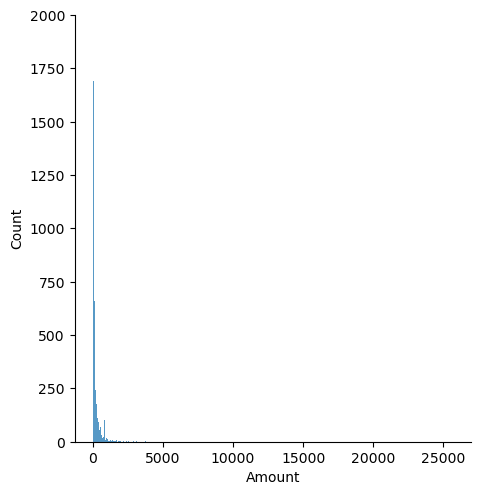

 Min: 0.0 Max: 25691.16 
 mean: 88.47268731099724 std: 250.3994371158016 
 median: 22.0 
 mode: 1.0


In [54]:
plt.figure(figsize=(10, 5), dpi=200)
sns.displot(data=df, x='Amount')
plt.ylim(0, 2000)
plt.show()

print(' Min:', df['Amount'].min(), 'Max:', df['Amount'].max(), '\n mean:', df['Amount'].mean(), 
      'std:', df['Amount'].std(),'\n', 'median:', df['Amount'].median(), 
      '\n', 'mode:', df['Amount'].mode()[0])

L'analyse de la distribution de la variable **Amount** met en évidence une forte asymétrie positive (16.98) caractérisée par une concentration importante de transactions de montant élevé et une longue queue correspondant à quelques transactions de montant faible. Cette distribution fortement déséquilibrée peut nuire aux performances des modèles d’apprentissage automatique. Afin de réduire cette asymétrie et de stabiliser la variance, une transformation logarithmique de la variable Amount sera appliquée.

La variable Time ne représente pas une grandeur statistique classique mais une information temporelle brute. Sa distribution reflète une structure cyclique liée aux habitudes de transaction au cours du temps. On observe :
- plusieurs pics (multimodale)
- des zones creuses
- une structure non aléatoire
Par conséquent ce n’est pas une distribution “statistique classique”.

* Pourquoi cette forme est normale (et logique)
Time représente le nombre de secondes écoulées depuis la première transaction. Donc :
- le dataset couvre plusieurs jours
- les comportements humains sont cycliques
- certaines heures sont plus actives que d’autres

Ainsi les pics peuvent correspondre à des heures d’activité élevée et les creux à des périodes de faible activité (nuit).

- On pourra la transformer afin d'obtenir l'heure précise de la transaction.


### II - 4 - ANALYSE VISUALISATION DU DESEQUILIBRE DES CLASSES

In [17]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


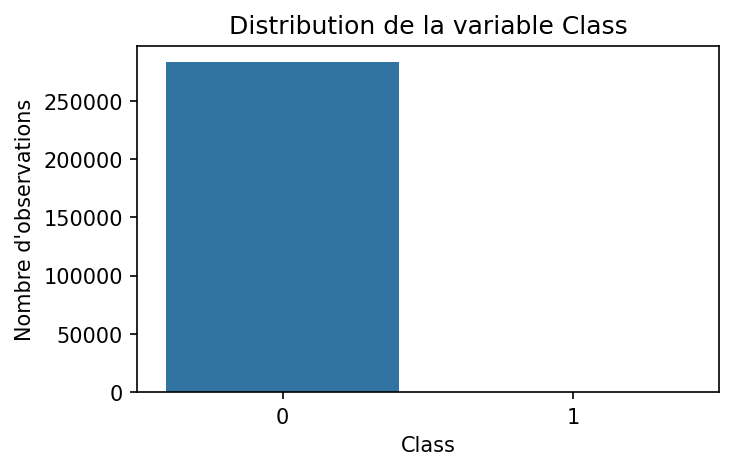

In [23]:
plt.figure(figsize=(5, 3), dpi=150)
sns.countplot(data=df, x='Class')
plt.xlabel("Class")
plt.ylabel("Nombre d'observations")
plt.title("Distribution de la variable Class")
plt.show()

In [24]:
class_counts = df["Class"].value_counts()

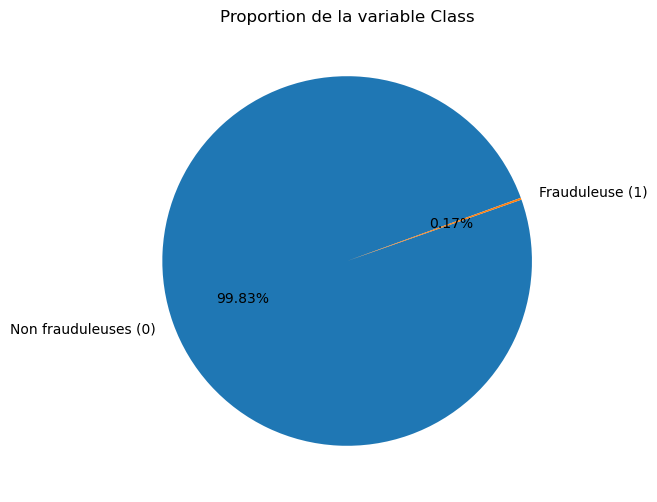

In [25]:
plt.figure(figsize=(6, 6), dpi=100)

plt.pie(
    class_counts,
    labels = ['Non frauduleuses (0)', 'Frauduleuse (1)'],
    autopct = "%1.2f%%",
    startangle = 20
)
plt.title("Proportion de la variable Class")
plt.show()

Nous avons :
* 99.8% de transactions non frauduleuses
* 0.17% de transactions frauduleuses

La distribution de la variable cible met en évidence un fort déséquilibre des classes. Les transactions frauduleuses représentent une proportion extrêmement faible du jeu de données. Ce déséquilibre rend l’accuracy inadaptée comme métrique principale et nécessite l’utilisation de métriques spécifiques ainsi que de méthodes de rééquilibrage lors de l’apprentissage.

### II - 4 - IDENTIFICATION DES DEFIS LIES AUX DONNEES

À l’issue de l’analyse exploratoire des données, plusieurs défis majeurs ont été identifiés. Ces défis concernent à la fois la structure des variables, la distribution des données et la nature du problème de détection de fraude.

* **1️ - Déséquilibre extrême de la variable cible**
    - La variable cible Class est fortement déséquilibrée
    - Les transactions frauduleuses représentent une très faible proportion du jeu de données
    - La classe majoritaire (transactions normales) domine largement
* Impact sur le Machine Learning
    - L’accuracy devient trompeuse
    - Un modèle naïf peut obtenir une performance élevée sans détecter de fraudes
    - Risque élevé de faux négatifs, particulièrement critique dans un contexte de fraude
* Défi associé
    - Choisir des métriques adaptées (recall, F1-score, PR-AUC) et mettre en place des méthodes de gestion du déséquilibre.

* **2 - Asymétrie marquée de certaines variables numériques**
    - La variable Amount présente une forte asymétrie positive
    - La distribution est caractérisée par une concentration de faibles montants et une longue queue à droite
    - La skewness élevée indique une dispersion dominée par quelques valeurs extrêmes
* Impact sur les modèles
    - Sensibilité accrue aux valeurs extrêmes
    - Instabilité des modèles linéaires et basés sur des distances
    - Risque de domination de l’apprentissage par quelques observations atypiques
* Défi associé
    - Réduire l’asymétrie par des transformations adaptées (logarithmique) tout en conservant l’information pertinente.

* **3 - Présence de valeurs extrêmes (outliers)**
    - Des valeurs extrêmes sont présentes, notamment pour la variable Amount
    - Des outliers existent également au sein de la classe majoritaire
* Particularité du contexte fraude
    - Les valeurs extrêmes ne sont pas nécessairement des erreurs
    - Certaines fraudes peuvent se manifester sous forme d’anomalies
* Défi associé
    - Trouver un équilibre entre robustesse statistique et préservation du signal métier, sans supprimer aveuglément les observations atypiques.

* **4 - Variables issues de L'ACP à interprétation limitée**
    - Les variables V1 à V28 sont issues d’une transformation PCA
    - Elles sont centrées mais peuvent présenter des distributions asymétriques
* Impact sur l’analyse
    - Interprétation métier directe impossible
    - Asymétrie non corrigeable par des transformations classiques
* Défi associé
    - Conserver ces variables telles quelles afin de préserver leur pouvoir discriminant, tout en les intégrant correctement dans le pipeline de préparation.

* **5 - Variable Time brute et peu exploitable directement**
    - La variable Time représente un compteur de secondes
    - Sa distribution est multimodale mais peu asymétrique
* Impact sur l’apprentissage
    - Peu interprétable telle quelle
    - Ne reflète pas directement les comportements transactionnels
* Défi associé
    - Transformer l’information temporelle en variables dérivées pertinentes (heure de la journée, encodage cyclique).

* **6 - Risque de fuite d’information (data leakage)**
    - Certaines techniques (rééquilibrage, encodage, scaling) peuvent introduire une fuite d’information
    - Le déséquilibre incite à des manipulations risquées si mal ordonnées
* Défi associé
    - Respecter un pipeline strict (split → transformation → rééquilibrage → apprentissage) afin de garantir la validité des résultats.

## III - PREPARATION ET TRANSFORMATIONS DES VARIABLES

### II - 4 - APPLICATION DES TRANSFORMATIONS